# Abstract
This notebook contains an auxilary analysis of neuron behaviour.

In [1]:
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest
import scipy.stats as stats
from utils import time_consuming
from utils.preprocessing import standardize_df

In [2]:
# WARNING: do not change dataset here. Text depends on it.
df = pd.read_csv("../data/22ht3.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,time_s,x,y,0.0,1.0,2.0,3.0,...,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0
0,0,0,0,67.70,876.202246,701.980008,-0.34655,-0.71631,-0.047737,0.793520,...,1.08940,-1.43040,1.28950,-1.73120,12.296000,0.490490,1.78360,-1.9901,-0.73521,2.0794
1,1,1,1,67.75,873.823553,698.247808,-0.46934,-0.72462,-0.026651,0.232830,...,0.37633,-2.80540,1.04790,-0.64049,7.207100,0.038311,1.26940,-2.3953,-0.62211,-2.9352
2,2,2,2,67.80,869.339334,684.910311,-0.79277,-0.90364,-0.063160,0.637430,...,0.38806,-2.21760,0.41558,-1.91790,8.628700,1.324600,1.81450,-1.8960,-0.47870,-1.2518
3,3,3,3,67.85,870.531773,678.403344,-1.04160,-1.10340,-0.197860,0.010588,...,0.42846,-2.65280,1.07950,-0.65687,6.032800,-1.038900,0.66639,-2.1342,-0.74338,-2.1278
4,4,4,4,67.90,873.077049,680.866207,-0.85335,-0.46933,0.164510,-0.079999,...,0.40836,0.80766,1.26150,-2.46150,-17.125999,0.016407,1.18670,-1.9257,-0.14995,-7.3924


# Data preprocessing

In [3]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.2", "Unnamed: 0.1"], axis=1)
df_no_time = df.drop(["time_s"], axis=1)
df_norm = standardize_df(df_no_time)
df_norm = df_norm.assign(time_s=df.time_s)
df_norm

,x,y,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,time_s
0,0.707681,0.674414,0.019897,0.043888,0.049243,0.096324,0.112920,0.082477,0.136665,0.160537,...,0.349561,0.326807,0.198808,0.361026,0.331943,0.622760,0.151974,0.223625,0.363966,67.70
1,0.703936,0.670267,0.017008,0.043645,0.050695,0.069473,0.092660,0.078581,0.155205,0.156131,...,0.307666,0.311243,0.246539,0.304999,0.320617,0.575973,0.104238,0.246286,0.216556,67.75
2,0.696875,0.655447,0.009400,0.038416,0.048181,0.088849,0.097853,0.082543,0.146584,0.157218,...,0.325576,0.270506,0.190638,0.320651,0.352835,0.625572,0.163060,0.275021,0.266042,67.80
3,0.698753,0.648217,0.003547,0.032582,0.038906,0.058830,0.096063,0.096194,0.152227,0.130040,...,0.312316,0.313278,0.245822,0.292071,0.293635,0.521104,0.134998,0.221988,0.240290,67.85
4,0.702760,0.650954,0.007975,0.051102,0.063859,0.054492,0.091954,0.070946,0.132699,0.132882,...,0.417753,0.325003,0.166849,0.037102,0.320068,0.568448,0.159561,0.340890,0.085531,67.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,0.627335,0.669614,0.131957,0.060452,0.075920,0.063369,0.106140,0.088559,0.090102,0.239386,...,0.358985,0.177467,0.250799,0.262381,0.297928,0.454922,0.462753,0.376774,0.271909,761.05
13868,0.627625,0.669290,0.169948,0.057496,0.075044,0.049427,0.109355,0.098269,0.095624,0.248339,...,0.376473,0.324005,0.292048,0.273576,0.276360,0.468932,0.458175,0.331978,0.279592,761.10
13869,0.627959,0.669706,0.182970,0.054578,0.050331,0.069357,0.104534,0.098112,0.087022,0.233656,...,0.391725,0.185280,0.305160,0.280402,0.325606,0.420158,0.483482,0.343217,0.334032,761.15
13870,0.629061,0.672204,0.196220,0.066394,0.063159,0.065946,0.112147,0.089826,0.090092,0.238140,...,0.383360,0.193483,0.242061,0.247040,0.316153,0.462335,0.538800,0.283782,0.360215,761.20


# Acitivity distribution

## Randomly choosen neurons
Here we present a distirbutions for a small set of neurons choosen on random.

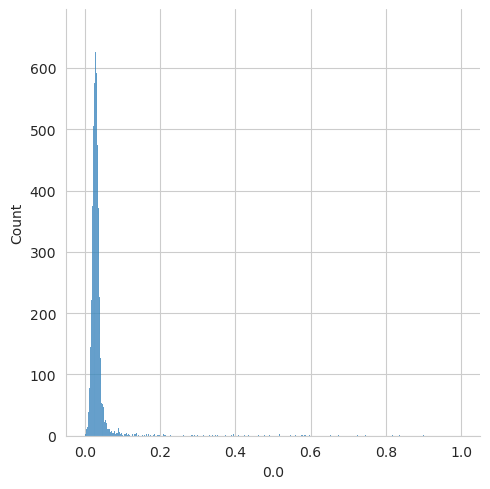

In [4]:
sns.displot(df_norm['0.0'])
plt.savefig("../out/0.0_dist.png")
plt.show()

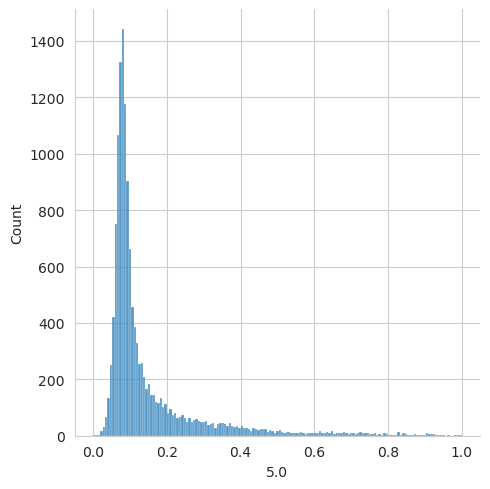

In [28]:
sns.displot(df_norm['5.0'])
plt.savefig("../out/5.0_dist.png")
plt.show()

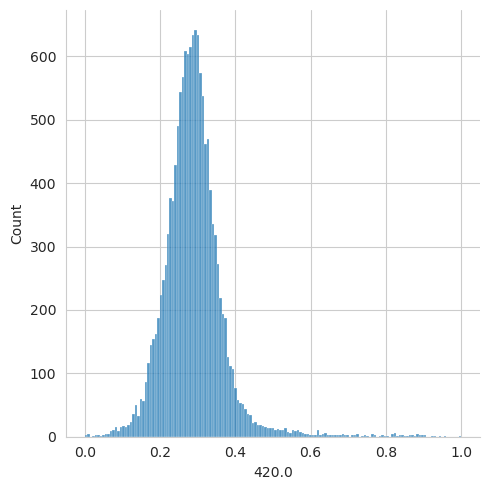

In [6]:
sns.displot(df_norm['420.0'])
plt.savefig("../out/420.0_dist.png")
plt.show()

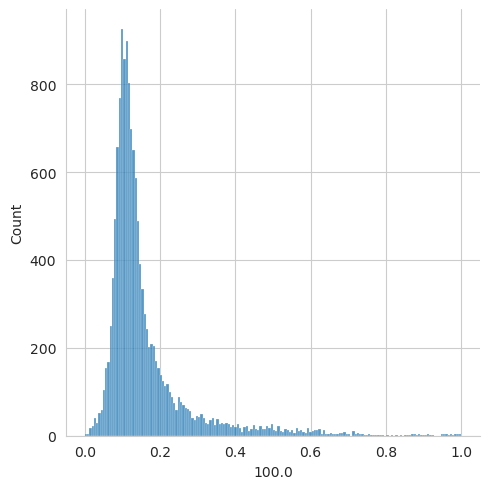

In [7]:
sns.displot(df_norm['100.0'])
plt.savefig("../out/100.0_dist.png")
plt.show()

## Global distribution

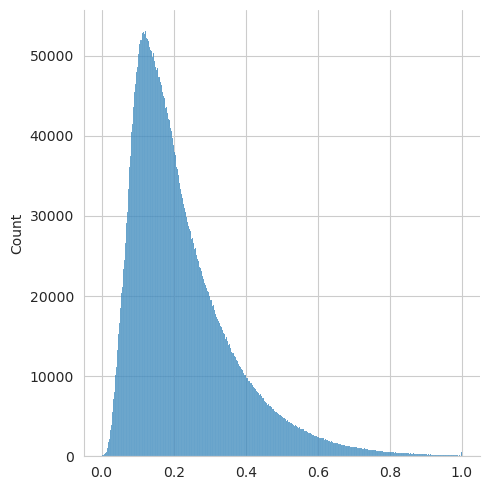

In [8]:
def plot_global_neuron_activity(min_limit=0.0):
    df_neurons = df_norm.drop(['time_s', 'x', 'y'], axis=1)
    raw_values = list()
    for column in df_neurons.columns:
        raw_values += filter(lambda x: x >= min_limit, list(df_neurons[column]))
    sns.displot(raw_values)
    plt.show()
plot_global_neuron_activity()

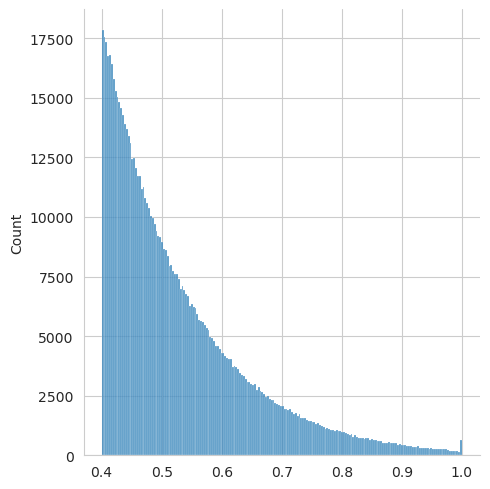

In [9]:
plot_global_neuron_activity(0.4)

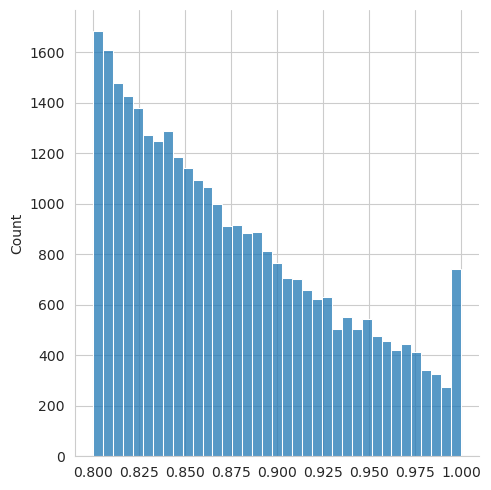

In [10]:
plot_global_neuron_activity(0.8)

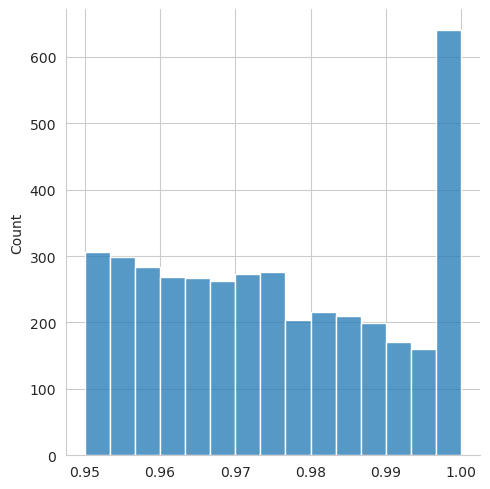

In [11]:
plot_global_neuron_activity(0.95)

From the plots we may see that activity is mostly has naer-normal distribution, possilby $\mathcal{\Chi}^2$ distribution whith small peak at $1.00$ which likely is peak activity which is achieved rarely.

## Distribution tests

In [12]:
def test_global_neuron_activity(cdf):
    df_neurons = df_norm.drop(['time_s', 'x', 'y'], axis=1)
    raw_values = list()
    for column in df_neurons.columns:
        raw_values += list(df_neurons[column])
    return kstest(raw_values, cdf)

In [13]:
test_global_neuron_activity(stats.norm.cdf)

KstestResult(statistic=0.508244152463809, pvalue=0.0, statistic_location=0.028831717729750083, statistic_sign=-1)

In [14]:
test_global_neuron_activity(stats.chi(1).cdf)

KstestResult(statistic=0.5778280634891813, pvalue=0.0, statistic_location=0.4186788356229631, statistic_sign=1)

In [15]:
test_global_neuron_activity(stats.chi(len(df_norm) - 3).cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.0, statistic_sign=1)

In [16]:
def test_particular_neuron_activity(neuron, cdf):
    df_neurons = df_norm.drop(['time_s', 'x', 'y'], axis=1)
    raw_values = list(df_neurons[neuron])
    return kstest(raw_values, cdf)

In [17]:
test_particular_neuron_activity('3.0', stats.chi(1).cdf)

KstestResult(statistic=0.8766038585114279, pvalue=0.0, statistic_location=0.09652905601967275, statistic_sign=1)

In [18]:
test_particular_neuron_activity('3.0', stats.norm.cdf)

KstestResult(statistic=0.5067124575852858, pvalue=0.0, statistic_location=0.021886898258361143, statistic_sign=-1)

# Activity plots

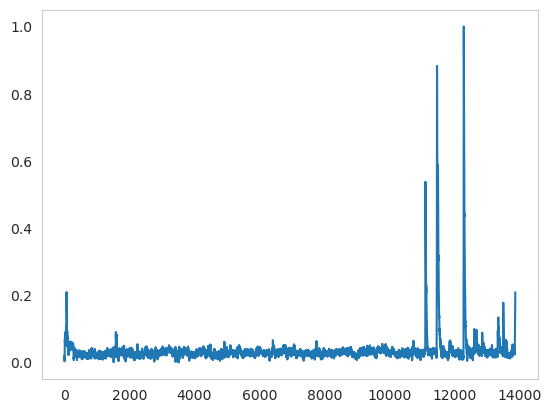

In [26]:
plt.plot(df_norm['0.0'])
plt.grid()
plt.savefig("../out/0_activity.png")
plt.show()

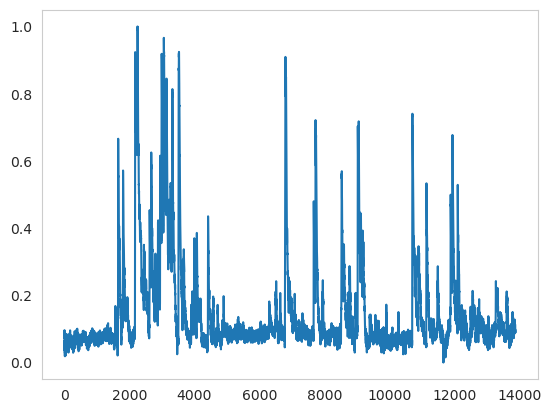

In [27]:
plt.plot(df_norm['5.0'])
plt.savefig("../out/5_activity.png")
plt.grid()
plt.show()

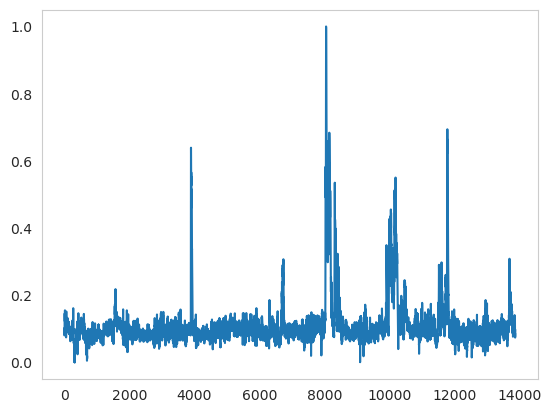

In [21]:
plt.plot(df_norm['95.0'])
plt.savefig("../out/95_activity.png")
plt.grid()
plt.show()

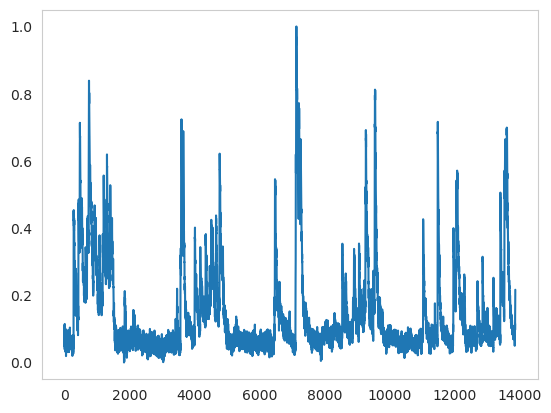

In [22]:
plt.plot(df_norm['42.0'])
plt.grid()
plt.savefig("../out/42_activity.png")
plt.show()

# Arena print

## 1-hole

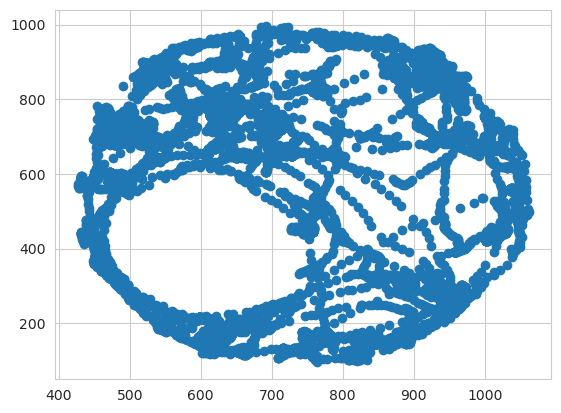

In [23]:
plt.scatter(df["x"], df["y"])
plt.savefig("../out/1hole.png")
plt.show()

## 3-hole

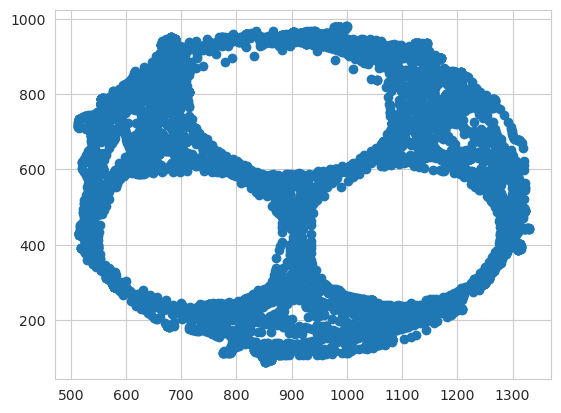

In [24]:
df = pd.read_csv("../data/22ht1.csv")
plt.scatter(df["x"], df["y"])
plt.savefig("../out/3hole.png")
plt.show()